# Imports

In [1]:
# Import standard libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# API
import requests
import json
import os

# Datetime
import datetime as datetime

In [2]:
# https://github.com/vera-institute/jail-population-data

vera_df = pd.read_csv('https://raw.githubusercontent.com/vera-institute/jail-population-data/master/jail_population.csv')
vera_df.head()

,fips,date,jail_population,county_name,state_name,urbanicity,reporting_jurisdictions,resident_population,jail_incarceration_rate_per_100k
0,1001,2020-01-01,185,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,331.1
1,1001,2020-01-02,184,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,329.3
2,1001,2020-01-03,178,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,318.6
3,1001,2020-01-04,177,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,316.8
4,1001,2020-01-05,183,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,327.6


# EDA

In [3]:
vera_df.shape

(178809, 9)

In [4]:
vera_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178809 entries, 0 to 178808
Data columns (total 9 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   fips                              178809 non-null  int64  
 1   date                              178809 non-null  object 
 2   jail_population                   178809 non-null  int64  
 3   county_name                       178734 non-null  object 
 4   state_name                        178664 non-null  object 
 5   urbanicity                        178734 non-null  object 
 6   reporting_jurisdictions           176780 non-null  object 
 7   resident_population               178734 non-null  float64
 8   jail_incarceration_rate_per_100k  178734 non-null  float64
dtypes: float64(2), int64(2), object(5)
memory usage: 12.3+ MB


In [5]:
vera_df['date']=pd.to_datetime(vera_df['date'])
vera_df.head()

,fips,date,jail_population,county_name,state_name,urbanicity,reporting_jurisdictions,resident_population,jail_incarceration_rate_per_100k
0,1001,2020-01-01,185,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,331.1
1,1001,2020-01-02,184,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,329.3
2,1001,2020-01-03,178,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,318.6
3,1001,2020-01-04,177,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,316.8
4,1001,2020-01-05,183,Autauga County,Alabama,small/mid,Autauga Metro Jail,55869.0,327.6


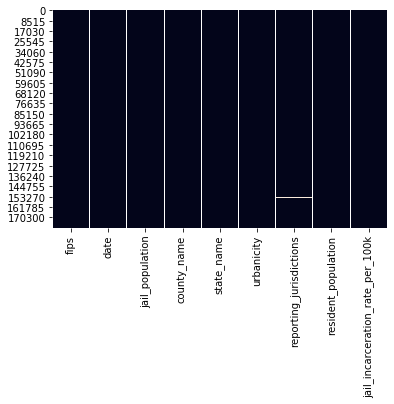

In [6]:
# Check for null values

sns.heatmap(vera_df.isnull(), cbar=False)

In [7]:
vera_df.columns

Index(['fips', 'date', 'jail_population', 'county_name', 'state_name',
       'urbanicity', 'reporting_jurisdictions', 'resident_population',
       'jail_incarceration_rate_per_100k'],
      dtype='object')

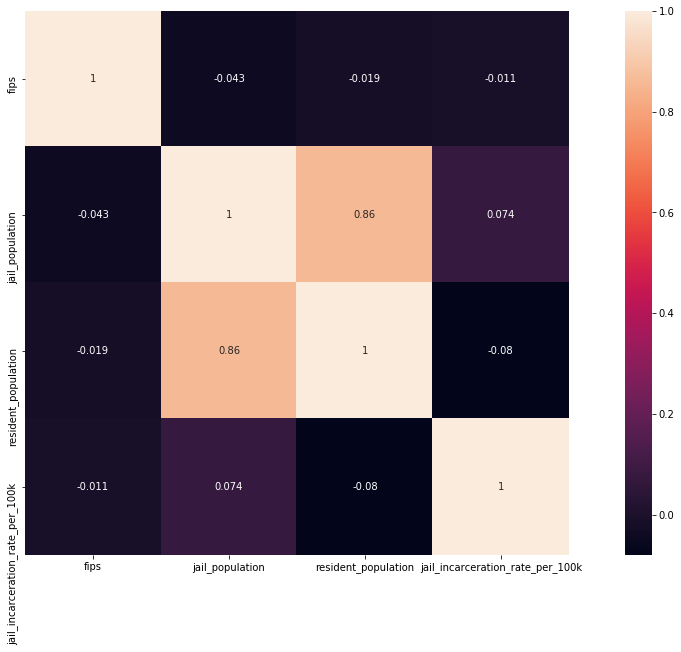

In [8]:
# Create heatmap

corrmat = vera_df[['fips', 'jail_population', 'resident_population',
       'jail_incarceration_rate_per_100k'\
             ]].corr()
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sns.heatmap(corrmat,square=True,annot=True)

findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.
findfont: Font family ['calibri'] not found. Falling back to DejaVu Sans.


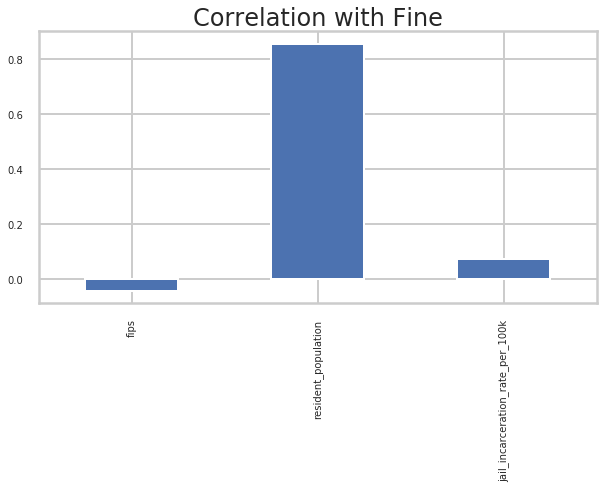

In [9]:
X = vera_df.drop(['jail_population'],axis=1)
y = vera_df['jail_population']

sns.set(style="whitegrid", palette=("deep"),font='calibri')
sns.set_context("poster")

X.corrwith(vera_df['jail_population']).plot.bar(figsize = (10, 5), title ="Correlation with Fine", fontsize = 10,
rot = 90, grid = True,)

In [10]:
#Round to the hour
# vera_df['date'] = vera_df['date'].dt.round('H')
vera_df.resample('W').sum()

TypeError: Only valid with DatetimeIndex, TimedeltaIndex or PeriodIndex, but got an instance of 'RangeIndex'

In [ ]:
chart = vera_df.groupby(["date"]).agg({'jail_population':'sum'})
chart.plot(kind='bar',figsize=(20,6))

# Feature Engineering

In [ ]:
#look into date issue